# Install Dependencies

In [54]:
# Uncomment to install dependencies
# ! pip install -U pip
# ! pip install -U setuptools wheel
# ! pip install "mxnet<2.0.0"
# ! pip install autogluon
# ! pip install kaggle

# Set Paths

In [3]:
submission_path = '../../data/submission/'
data_path = '../../data/'

# Imports

In [4]:
from autogluon.tabular import TabularPredictor
import pandas as pd
from sklearn.model_selection import train_test_split

# Data Analysis

In [5]:
# read data files
data_target = pd.read_csv(data_path + 'train.csv')
data_no_target = pd.read_csv(data_path + 'test.csv')

In [6]:
data_target.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
data_no_target.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


# Data Processing

## Filtering

Drop `casual` and `registered` columns becuase there are no corresponding columns in the test data.

In [8]:
data_target.drop(columns=['casual', 'registered'], inplace=True)

In [10]:
data_target.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


## Train Test Split

In [60]:
train_df, test_df = train_test_split(data_target, test_size=0.2, random_state=0)

# Model Training

## Training using AutoGluon

In [61]:
predictor = TabularPredictor(label='count', problem_type="regression", eval_metric="r2").fit(
    train_df,
    time_limit=3600,
    presets='best_quality'
)

No path specified. Models will be saved in: "AutogluonModels/ag-20220606_150830/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 3600s
AutoGluon will save models to "AutogluonModels/ag-20220606_150830/"
AutoGluon Version:  0.4.1
Python Version:     3.9.12
Operating System:   Darwin
Train Data Rows:    8708
Train Data Columns: 9
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    6197.34 MB
	Train Data (Original)  Memory Usage: 1.22 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting Identity

## Model Evaluations

### Overall Observations

In [62]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model  score_val  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  RandomForestMSE_BAG_L2   0.828174       2.338869  2944.832200                0.440707           9.874072            2       True          9
1     WeightedEnsemble_L3   0.828174       2.339520  2944.835957                0.000651           0.003757            3       True         10
2   KNeighborsDist_BAG_L1   0.726306       0.028350     0.015024                0.028350           0.015024            1       True          2
3     WeightedEnsemble_L2   0.726306       0.028806     0.319630                0.000456           0.304606            2       True          8
4   KNeighborsUnif_BAG_L1   0.610059       0.035774     0.015754                0.035774           0.015754            1       True          1
5  RandomForestMSE_BAG_L1   0.554040       0.442683     3.179050                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.610059010876618,
  'KNeighborsDist_BAG_L1': 0.7263057057529104,
  'RandomForestMSE_BAG_L1': 0.5540399311763098,
  'CatBoost_BAG_L1': 0.4735268806190912,
  'ExtraTreesMSE_BAG_L1': 0.5070344213027012,
  'NeuralNetFastAI_BAG_L1': 0.43639824144684614,
  'NeuralNetTorch_BAG_L1': 0.42429444833909924,
  'WeightedEnsemble_L2': 0.7263057057529104,
  'RandomForestMSE_BAG_L2

In [63]:
predictor.evaluate(test_df)

Evaluation: r2 on test data: 0.8240171735358562
Evaluations on test data:
{
    "r2": 0.8240171735358562,
    "root_mean_squared_error": -76.46684430396914,
    "mean_squared_error": -5847.178277807507,
    "mean_absolute_error": -46.43268121646236,
    "pearsonr": 0.9079201495648589,
    "median_absolute_error": -24.6683349609375
}


{'r2': 0.8240171735358562,
 'root_mean_squared_error': -76.46684430396914,
 'mean_squared_error': -5847.178277807507,
 'mean_absolute_error': -46.43268121646236,
 'pearsonr': 0.9079201495648589,
 'median_absolute_error': -24.6683349609375}

<AxesSubplot:xlabel='model'>

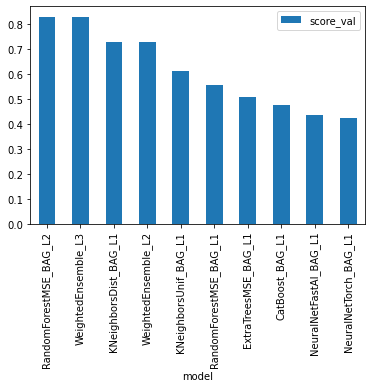

In [64]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [65]:
predictor.get_model_best()

'WeightedEnsemble_L3'

We can see that the `WeightedEnsemble_L3` Machine Learning Model out performs all other models. This model is then used to make predictions on the test data obtained by kaggle.

### Feature Importance

In [66]:
predictor.feature_importance(data_target, num_shuffle_sets=10)

Computing feature importance via permutation shuffling for 9 features using 5000 rows with 10 shuffle sets...
	395.06s	= Expected runtime (39.51s per shuffle set)
	9195.18s	= Actual runtime (Completed 10 of 10 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
datetime,1.746622,0.028200,5.995897e-18,10,1.775603,1.717642
humidity,0.007556,0.001968,3.485925e-07,10,0.009579,0.005533
temp,0.005368,0.001816,3.127841e-06,10,0.007234,0.003502
season,0.000895,0.000603,5.631123e-04,10,0.001514,0.000276
weather,0.000054,0.000752,4.128791e-01,10,0.000827,-0.000719
workingday,-0.000038,0.001070,5.433261e-01,10,0.001062,-0.001138
holiday,-0.000170,0.000193,9.892786e-01,10,0.000029,-0.000369
atemp,-0.000673,0.001732,8.747289e-01,10,0.001107,-0.002452
windspeed,-0.001175,0.000755,9.995882e-01,10,-0.000399,-0.001952


The p_values for the features ***holiday***, ***workingday***, ***windspeed*** and ***atemp*** are relatively large and the importance value is negative so we can deduce that these features are not useful features for the model training process. 

## Predictions

In [67]:
predictions = predictor.predict(data_no_target)

# Create Kaggle Submission

In [68]:
submission = pd.read_csv(submission_path + 'sampleSubmission.csv')
submission['count'] = predictions

In [69]:
submission.to_csv(submission_path + 'Submission_training_time_3600.csv', index=False)